<a href="https://colab.research.google.com/github/Dei-gratia/Machine-Learning-Projects/blob/main/with_mask_files/Face_Mask_Detection_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
#import packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as npimg
import cv2
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split
from zipfile import ZipFile

In [43]:
#install kaggle
!pip install kaggle

In [44]:
#configure the path for kaggle .json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [45]:
#get data from kaggle using API
!kaggle datasets download -d omkargurav/face-mask-dataset

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [46]:
#extract the compressed dataset
dataset = "/content/face-mask-dataset.zip"

with ZipFile(dataset, "r") as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [47]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [48]:
with_mask_files = os.listdir("/content/data/with_mask")
print(with_mask_files[0:5])

['with_mask_1021.jpg', 'with_mask_3549.jpg', 'with_mask_2019.jpg', 'with_mask_2339.jpg', 'with_mask_1134.jpg']


In [49]:
without_mask_files = os.listdir("/content/data/without_mask")
print(without_mask_files[0:5])

['without_mask_2476.jpg', 'without_mask_2843.jpg', 'without_mask_506.jpg', 'without_mask_396.jpg', 'without_mask_1289.jpg']


In [50]:
print("Number of with mask images: ", len(with_mask_files))
print("Number of without mask images: ", len(without_mask_files))

Number of with mask images:  3725
Number of without mask images:  3828


In [51]:
#create labels for the two classes of images
with_mask_labels = [1] * len(with_mask_files)
without_mask_labels = [0] * len(without_mask_files)
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [52]:
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


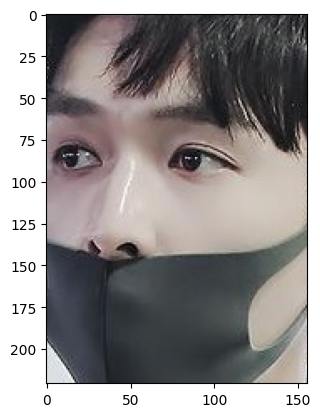

In [53]:
#displaying sample with mask image
img = npimg.imread("/content/data/with_mask/with_mask_1021.jpg")
imgplot = plt.imshow(img)
plt.show()

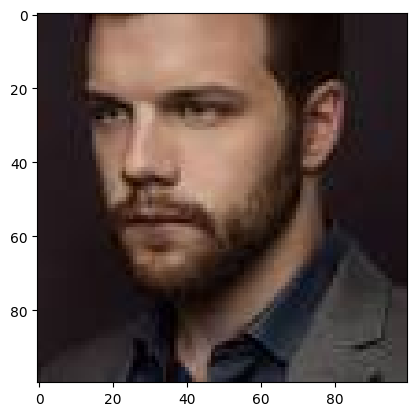

In [54]:
#displaying sample with mask image
img = npimg.imread("/content/data/without_mask/without_mask_2476.jpg")
imgplot = plt.imshow(img)
plt.show()

**Image processing**

In [57]:
#convert images to numpy arrays

with_mask_path = "/content/data/with_mask/"

data = []

for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128, 128))
  image = image.convert("RGB")
  image = np.array(image)
  data.append(image)


without_mask_path = "/content/data/without_mask/"

for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128, 128))
  image = image.convert("RGB")
  image = np.array(image)
  data.append(image)

len(data)

7553